# Preprocessing

We will try to train different classification models on the data like Logistic Regression, k-nearest neighbors classifier, Random Forest and a Support Vector Machine.

In [101]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [102]:
#File does not contain headers so we need to load the headers manually
features = ["Age", "Gender", "Total Bilirubin", "Direct Bilirubin", "Alkphos Alkaline Phosphotase", "Sgpt Alamine Aminotransferase", "Sgot Aspartate Aminotransferase", "Total Protiens", "Albumin", "Albumin-Globulin Ratio", "Selector"]
data = pd.read_csv('ilpd.csv', names = features)
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [103]:
#Overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                                583 non-null int64
Gender                             583 non-null object
Total Bilirubin                    583 non-null float64
Direct Bilirubin                   583 non-null float64
Alkphos Alkaline Phosphotase       583 non-null int64
Sgpt Alamine Aminotransferase      583 non-null int64
Sgot Aspartate Aminotransferase    583 non-null int64
Total Protiens                     583 non-null float64
Albumin                            583 non-null float64
Albumin-Globulin Ratio             579 non-null float64
Selector                           583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


The Albumin-Globulin Ratio feature has four missing values, as seen above. Here, we are dropping those particular rows which have missing data. We could, in fact, fill those place with values of our own, using options like: 
1. A constant value that has meaning within the domain, such as 0, distinct from all other values.
2. A value from another randomly selected record, or the immediately next or previous record.
3. A mean, median or mode value for the column.
4. A value estimated by another predictive model.

But here, since a very small fraction of values are missing, we choose to drop those rows. 

In [104]:
#Transfrom Gender string into float values
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
data.loc[:,'Gender'] = le.transform(data['Gender'])

#Remove rows with missing values
data = data.dropna(how = 'any', axis = 0)

#Also transform Selector variable into usual conventions followed
data['Selector'] = data['Selector'].map({2:0, 1:1})

In [105]:
#Overview of data
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [106]:
#features characteristics to determine if feature scaling is necessary
data.describe()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


It clearly reflects from the above output that values across different variables are distributed far too extensively. We could perform feature scaling or normalization so as to improve the classifier accuracy.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(data, data['Selector'], random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exploratory Data Analysis

In [108]:
#Determining the healthy-affected split
print("Positive records:", data['Selector'].value_counts().iloc[0])
print("Negative records:", data['Selector'].value_counts().iloc[1])

Positive records: 414
Negative records: 165


This output confirms that we have 414 positive and 165 negative records. This indicates that this is a highly unbalanced dataset.

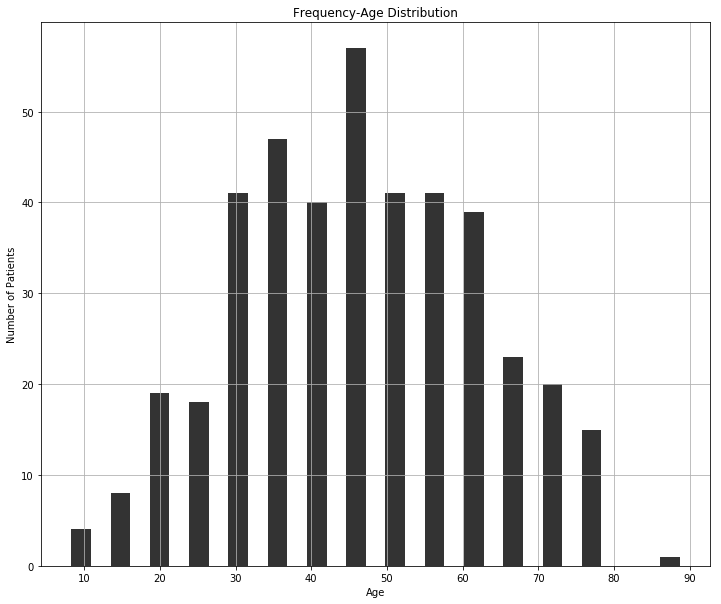

In [109]:
#Determine statistics based on age
plt.figure(figsize=(12, 10))
plt.hist(data[data['Selector'] == 1]['Age'], bins = 16, align = 'mid', rwidth = 0.5, color = 'black', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution')
plt.grid(True)
plt.savefig('fig1')
plt.show()

Looking at the age vs. frequency graph, we can observe that middle-aged people are the worst affected. Even elderly people are also suffering from liver ailments, as seen by the bar sizes at ages 60-80.

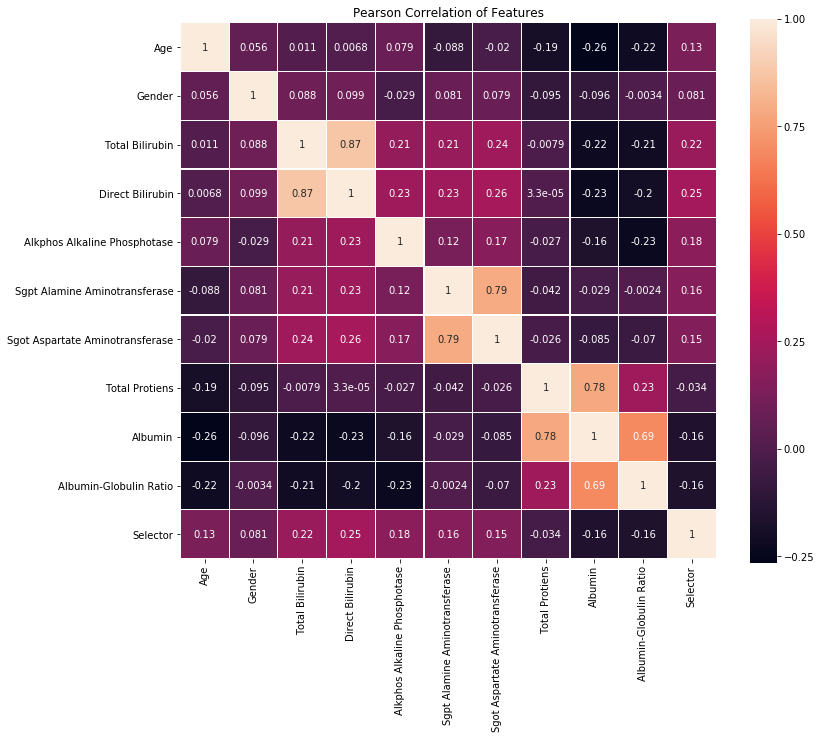

In [110]:
#correlation-matrix
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(data.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.savefig('fig2')
plt.show()

The correlation matrix gives us the relationship between two features. As seen above, the following pairs of features seem to be very closely related as indicated by their high correlation coefficients:
1. Total Bilirubin and Direct Bilirubin(0.87)
2. Sgpt Alamine Aminotransferase and Sgot Aspartate Aminotransferase(0.79)
3. Albumin and Total Proteins(0.78)
4. Albumin and Albumin-Globulin Ratio(0.69)

# Using Classification Algorithms

Let us now evaluate the performance of various classifiers on this dataset. For the sake of understanding as to how feature scaling affects classifier performance, we will train models using both scaled and unscaled data.
Since we are interested in capturing records of people who have been tested positive, we will base our classifier evaluation metric on precision and recall instead of accuracy.
We could also use F1 score, since it takes into account both precision and recall.

### 1. Logistic Regression Classifier

In [111]:
#Using normal data
logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
print("Logistic Regression Classifier on unscaled test data:")
print("Accuracy:", logreg.score(X_test, y_test))
print("Precision:", precision_score(y_test, logreg.predict(X_test)))
print("Recall:", recall_score(y_test, logreg.predict(X_test)))
print("F-1 score:", f1_score(y_test, logreg.predict(X_test)))

Logistic Regression Classifier on unscaled test data:
Accuracy: 0.993103448276
Precision: 0.990476190476
Recall: 1.0
F-1 score: 0.995215311005


In [112]:
#Using feature-scaled data
logreg_scaled = LogisticRegression(C = 0.1).fit(X_train_scaled, y_train)
print("Logistic Regression Classifier on scaled test data:")
print("Accuracy:", logreg_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, logreg_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, logreg_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, logreg_scaled.predict(X_test_scaled)))

Logistic Regression Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


Well! The performance has definitely improved by feature scaling, though not drastically, as there was already very little scope of improvement.
Let us look at other classifiers and analyse how they react to scaling.

### 2. SVM Classifier with RBF kernel

In [113]:
#Using normal data
svc_clf = SVC(C = 0.1, kernel = 'rbf').fit(X_train, y_train)
print("SVM Classifier on unscaled test data:")
print("Accuracy:", svc_clf.score(X_test, y_test))
print("Precision:", precision_score(y_test, svc_clf.predict(X_test)))
print("Recall:", recall_score(y_test, svc_clf.predict(X_test)))
print("F-1 score:", f1_score(y_test, svc_clf.predict(X_test)))


SVM Classifier on unscaled test data:
Accuracy: 0.71724137931
Precision: 0.71724137931
Recall: 1.0
F-1 score: 0.835341365462


In [114]:
#Using scaled data
svc_clf_scaled = SVC(C = 0.1, kernel = 'rbf').fit(X_train_scaled, y_train)
print("SVM Classifier on scaled test data:")
print("Accuracy:", svc_clf_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, svc_clf_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, svc_clf_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, svc_clf_scaled.predict(X_test_scaled)))

SVM Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


Again perfect scores! This time, the performance improvement is quite noticeable, as there is a rise of almost 0.18 in the F-1 score.

### 3. K-NN Classifier

In [115]:
#Using normal data
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print("k-NN Classifier on unscaled test data:")
print("Accuracy:", knn.score(X_test, y_test))
print("Precision:", precision_score(y_test, knn.predict(X_test)))
print("Recall:", recall_score(y_test, knn.predict(X_test)))
print("F-1 score:", f1_score(y_test, knn.predict(X_test)))

k-NN Classifier on unscaled test data:
Accuracy: 0.613793103448
Precision: 0.703389830508
Recall: 0.798076923077
F-1 score: 0.747747747748


In [116]:
#Using scaled data
knn_scaled = KNeighborsClassifier(n_neighbors = 5)
knn_scaled.fit(X_train_scaled, y_train)
print("SVM Classifier on scaled test data:")
print("Accuracy:", knn_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, knn_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, knn_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, knn_scaled.predict(X_test_scaled)))

SVM Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


### 4. Random Forest Classifier

In [117]:
#using normal data
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(X_train, y_train)
print("SVM Classifier on unscaled test data:")
print("Accuracy:", rfc.score(X_test, y_test))
print("Precision:", precision_score(y_test, rfc.predict(X_test)))
print("Recall:", recall_score(y_test, rfc.predict(X_test)))
print("F-1 score:", f1_score(y_test, rfc.predict(X_test)))

SVM Classifier on unscaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


In [118]:
#using scaled data
rfc_scaled = RandomForestClassifier(n_estimators = 20)
rfc_scaled.fit(X_train_scaled, y_train)
print("Random Forest Classifier on scaled test data:")
print("Accuracy:", rfc_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, rfc_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, rfc_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, rfc_scaled.predict(X_test_scaled)))

Random Forest Classifier on scaled test data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0


Random Forest Classifier works well either way, it seems.

# Conclusion

Feature scaling definitely was helpful in improving model performance. While the Random Forest Classifier performed equally well with and without feature scaling, it is not necessary that this may be the case always. For, performance issues with feature scaling depend on a lot of factors:
1. Understanding the data distribution is important. It is highly possible that there may be some features which are almost constant except for a small noise-driven variation. This noise would then be amplified greatly by the normalization.
2. The regularization parameter C is also a very important factor in classifier performance. This is crucial either way, whether or not feature scaling is done.

# Further applications

It is not expected to get the same level of performance on bigger and denser data sets. The main reasons behind this are:
1. The dataset we worked on was very small, consisting of only 583 observations, of which 4 were dropped.
2. The dataset was highly unbalanced, the postive records being three times the number of negative ones.

Hence, even though we have obtained perfect scores on this dataset, the performance of the same models on similar but bigger datasets is expected to worsen.